In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data_path = 'Mall_Customers.csv'

In [4]:
data = pd.read_csv(data_path, index_col=0)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
data.rename({'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)': 'Spending_score'}, axis = 1, inplace = True)

In [7]:
data.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_score'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Univariate Analysis

In [9]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

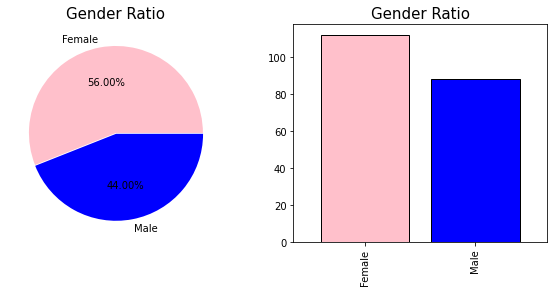

In [10]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
ax[0].pie(data.Gender.value_counts(), explode=[0.,0.01], labels = sorted(data.Gender.unique()), autopct='%.2f%%',
        colors = ['pink', 'blue'])
ax[0].set_title('Gender Ratio', fontsize = 15)
ax[1] = data.Gender.value_counts().plot(kind = 'bar', color = ['pink', 'blue'],
                                width = 0.8, edgecolor = 'black')
ax[1].set_title('Gender Ratio', fontsize = 15)
plt.show()

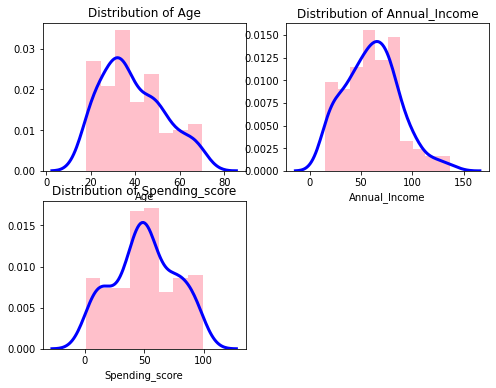

In [11]:
# Create figure - About the same speed as non oop method.

fig = plt.figure(figsize=(8,6))

for i,col in enumerate(data.columns[data.dtypes == 'int64'].to_list()):
    ax = fig.add_subplot(2 , 2, i+1)
    ax = sns.distplot(data[col], kde_kws={'color': 'blue', 'lw': 3},
            hist_kws = {'color': 'pink', 'lw' : 3, 
                       'alpha' : 1, })
    ax.set_title(f'Distribution of {col}')
plt.show()

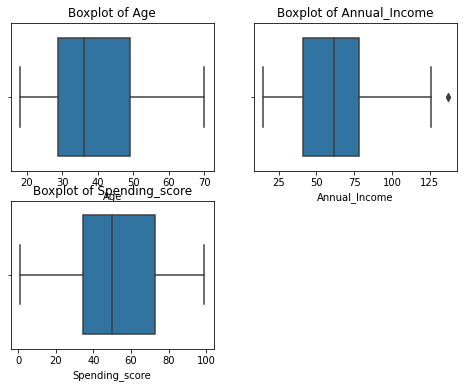

In [12]:
# Create figure - About the same speed as non oop method.

fig = plt.figure(figsize=(8,6))

for i,col in enumerate(data.columns[data.dtypes == 'int64'].to_list()):
    ax = fig.add_subplot(2 , 2, i+1)
    ax = sns.boxplot(data[col])
    ax.set_title(f'Boxplot of {col}')
plt.show()

### Bivariate Visualisations

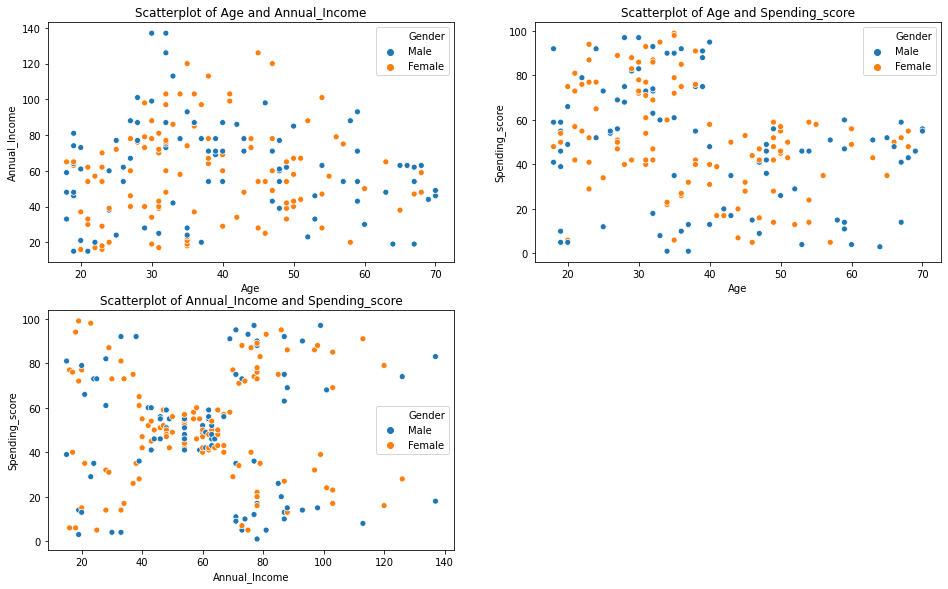

In [13]:
# Boxplots, violinplots etc...

# Using Itertools combinations for getting the pairs of unique columns 

from itertools import combinations

# Getting consecutive rows from columns list using itertools combination

fig = plt.figure(figsize=(16,15))
for i, item in enumerate(list(combinations(data.columns.to_list()[1:],2))):
    ax = fig.add_subplot(3, 2, i+1)
    ax = sns.scatterplot(x = item[0] , y =item[1], data = data, hue = 'Gender')
    ax.set_title(f'Scatterplot of {item[0]} and {item[1]}')

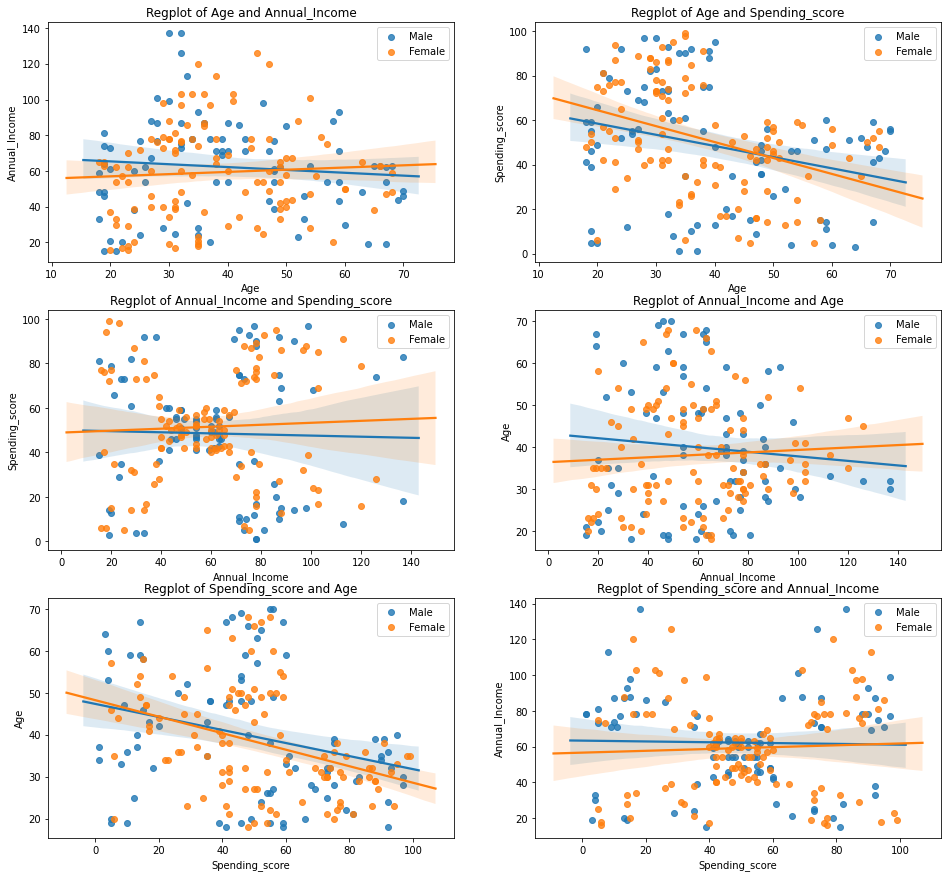

In [14]:
# Multivariate plots with Gender
# Regression Plots using the same funda but need to go both ways, since first combinations are 4, simply increment axis
# for second second plot by 4.

fig = plt.figure(figsize=(16,15))
for i, item in enumerate(list(combinations(data.columns.to_list()[1:],2))):
    ax = fig.add_subplot(3, 2, i+1)
    ax = sns.regplot(x = item[0] , y =item[1], data = data.loc[data['Gender'] == 'Male'], label='Male')
    ax = sns.regplot(x = item[0] , y =item[1], data = data.loc[data['Gender'] == 'Female'], label='Female')
    ax.legend()
    ax.set_title(f'Regplot of {item[0]} and {item[1]}')
    ax = fig.add_subplot(3, 2, i+4)
    ax = sns.regplot(x = item[1] , y =item[0], data = data.loc[data['Gender'] == 'Male'], label = 'Male')
    ax = sns.regplot(x = item[1] , y =item[0], data = data.loc[data['Gender'] == 'Female'], label = 'Female')
    ax.set_title(f'Regplot of {item[1]} and {item[0]}')
    ax.legend()

### Segmentation Using K-Means Clustering

#### Feature Scaling/Standardizing Data
K means requires the data to be scaled as it is exploitin properties in Euclidean distance.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# One - hot encode, Uusing categorical features with scaling seems complicated, look at this later.
# Just scale the Numeric features and then perform the clustering.

data_num = data[['Age', 'Annual_Income']]

In [17]:
scale = StandardScaler()

data_num_scaled = scale.fit_transform(data_num)

In [18]:
# restoring to dataframe.

data_num_scaled = pd.DataFrame(data = data_num_scaled, index = data_num.index, columns = data_num.columns)

### K-Means Segmentation

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
# Based on Age and Annual income 


# fitting based on the two columns, using loop to determine the number of clusters. 
# Store inertia or SSE score per K in a list and then plot vs no of clusters.

error = []
sil_score = []
# silhoutte score requires atleast 2 labels

for i in range(2, 10):
    clust = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300).fit(data_num_scaled[['Age', 'Annual_Income']].to_numpy())
    sil_score.append(silhouette_score(data_num_scaled[['Age', 'Annual_Income']].to_numpy(), clust.labels_))
    error.append(clust.inertia_)

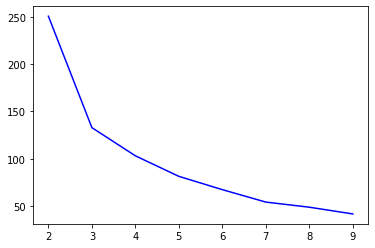

In [21]:
# Plot scores for clusters
# Lets go for three clusters

plt.plot(range(2, 10), error, 'b-')
plt.show()

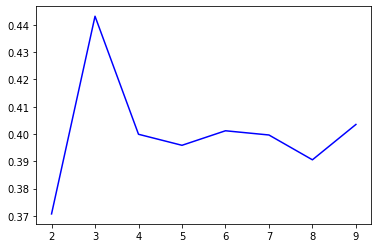

In [22]:
## Clusters is the most ideal for the data.
plt.plot(range(2, 10), sil_score, 'b-')
plt.show()

In [23]:
# Predicting with 3 clusters and Placing Preds back in dataframe.
clust_age= KMeans(n_clusters=3, init='k-means++',
                  n_init=10, max_iter=300).fit(data_num_scaled[['Age', 'Annual_Income']].to_numpy())


labels = clust_age.labels_
# Cluster Centers 
centroids = clust_age.cluster_centers_

In [24]:
data_num['Age_inc_clusters'] = labels

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
norm_centroid = scale.inverse_transform(centroids)

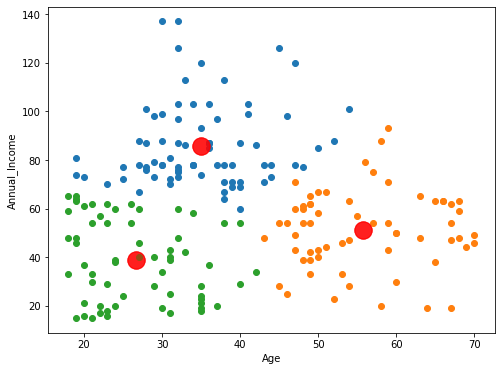

In [26]:
# Group dataframe according to clusters and plot inside loop, could have just filtered the DF by value of clusters
# and plotted

grouped_df = data_num.groupby(['Age_inc_clusters'])

plt.figure(figsize=(8,6))
for i in range(3):
    plt.xlabel('Age')
    plt.ylabel('Annual_Income')
    plt.scatter(x = grouped_df.get_group(i).Age.to_list(), y = grouped_df.get_group(i).Annual_Income.to_list())
    # plotting centroids 
    plt.scatter(x = norm_centroid[: , 0] , y =  norm_centroid[: , 1], s = 300 , c = 'red' , alpha = 0.5)

#### Using Annual Income and Spending Score

In [27]:
data_num = data[['Spending_score', 'Annual_Income']]
scale = StandardScaler()
data_num_scaled = scale.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data = data_num_scaled, index = data_num.index, columns = data_num.columns)

In [28]:
# fitting based on the two columns, using loop to determine the number of clusters. 
# Store inertia or SSE score per K in a list and then plot vs no of clusters.

error = []
sil_score = []
# silhoutte score requires atleast 2 labels

for i in range(2, 10):
    clust = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300).fit(data_num_scaled.to_numpy())
    sil_score.append(silhouette_score(data_num_scaled.to_numpy(), clust.labels_))
    error.append(clust.inertia_)

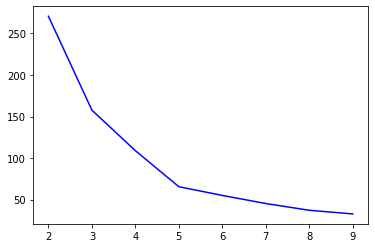

In [29]:
# Plot scores for clusters
# Lets go for three clusters

plt.plot(range(2, 10), error, 'b-')
plt.show()

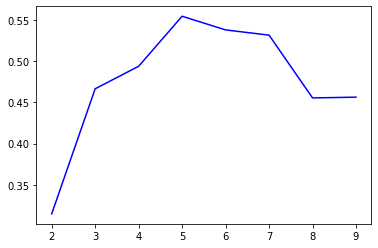

In [30]:
## 5 Clusters is the most ideal for the data.
plt.plot(range(2, 10), sil_score, 'b-')
plt.show()

In [31]:
# Predicting with 3 clusters and Placing Preds back in dataframe.
clust_age= KMeans(n_clusters=5, init='k-means++',
                  n_init=10, max_iter=300).fit(data_num_scaled.to_numpy())


labels = clust_age.labels_
# Cluster Centers 
centroids = clust_age.cluster_centers_
data_num['inc_spend_clusters'] = labels

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
norm_centroid = scale.inverse_transform(centroids)

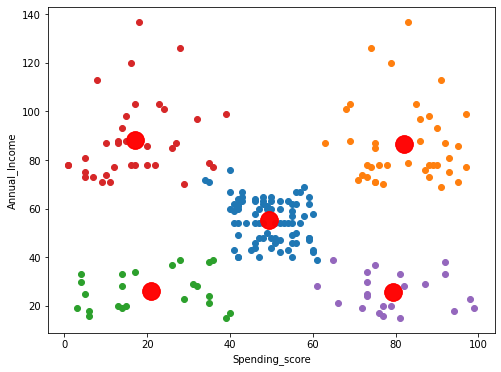

In [33]:
# Group dataframe according to clusters and plot inside loop, could have just filtered the DF by value of clusters
# and plotted

grouped_df = data_num.groupby(['inc_spend_clusters'])

plt.figure(figsize=(8,6))
for i in range(5):
    plt.xlabel('Spending_score')
    plt.ylabel('Annual_Income')
    plt.scatter(x = grouped_df.get_group(i).Spending_score.to_list(), y = grouped_df.get_group(i).Annual_Income.to_list())
    # plotting centroids 
    plt.scatter(x = norm_centroid[: , 0] , y =  norm_centroid[: , 1], s = 300 , c = 'red' , alpha = 0.5)

### Clustering with all 3 continuous variables

In [34]:
data_num = data[['Age', 'Annual_Income', 'Spending_score']]
scale = StandardScaler()
data_num_scaled = scale.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data = data_num_scaled, index = data_num.index, columns = data_num.columns)

In [35]:
# fitting based on the two columns, using loop to determine the number of clusters. 
# Store inertia or SSE score per K in a list and then plot vs no of clusters.

error = []
sil_score = []
# silhoutte score requires atleast 2 labels

for i in range(2, 15):
    clust = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300).fit(data_num_scaled.to_numpy())
    sil_score.append(silhouette_score(data_num_scaled.to_numpy(), clust.labels_))
    error.append(clust.inertia_)

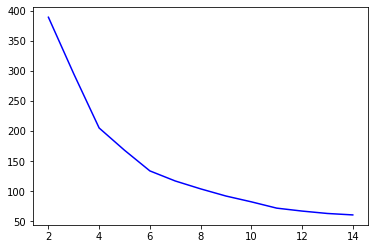

In [36]:
# Plot scores for clusters
# Lets go for three clusters

plt.plot(range(2, 15), error, 'b-')
plt.show()

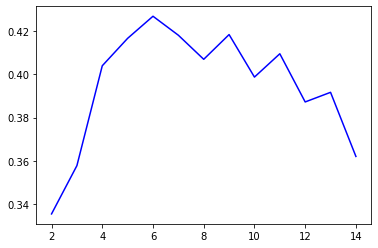

In [37]:
## 6 Clusters is the most ideal for the data.
plt.plot(range(2, 15), sil_score, 'b-')
plt.show()

In [38]:
# Predicting with 3 clusters and Placing Preds back in dataframe.
clust_age= KMeans(n_clusters=6, init='k-means++',
                  n_init=10, max_iter=300).fit(data_num_scaled.to_numpy())


labels = clust_age.labels_
# Cluster Centers 
centroids = clust_age.cluster_centers_
data_num['all_clusters'] = labels
data['all_clusters'] = labels
norm_centroid = scale.inverse_transform(centroids)

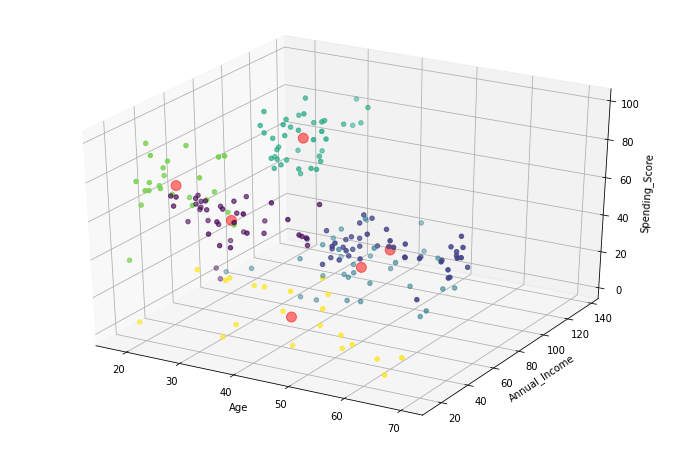

In [39]:
## import toolkit for 3D plotting 
from mpl_toolkits.mplot3d import Axes3D, axes3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection= '3d')
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spending_Score')
ax.scatter(xs = norm_centroid[: , 0] , ys =  norm_centroid[: , 1],zs = norm_centroid[: , 2],
           s = 100 , c = 'red' , alpha = 0.5)
ax.scatter(xs = data['Age'], ys = data['Annual_Income'],
           zs = data['Spending_score'], marker='o', c = data['all_clusters'])
plt.show()

### Cluster Statistics

In [56]:
from IPython.display import display
grouped_df_final = data.groupby(['all_clusters'])

for i in range(6):
    temp = grouped_df_final.get_group(i)
    print(f'CLuster Number {i}')
    display(temp.describe())

CLuster Number 0


,Age,Annual_Income,Spending_score,all_clusters
count,39.000000,39.000000,39.000000,39.0
mean,26.512821,57.974359,46.692308,0.0
std,7.104008,10.024935,11.907879,0.0
min,18.000000,40.000000,5.000000,0.0
25%,20.000000,51.000000,42.000000,0.0
50%,26.000000,60.000000,49.000000,0.0
75%,31.500000,64.500000,55.000000,0.0
max,40.000000,76.000000,60.000000,0.0


CLuster Number 1


,Age,Annual_Income,Spending_score,all_clusters
count,45.000000,45.000000,45.000000,45.0
mean,56.333333,54.266667,49.066667,1.0
std,8.453079,8.975725,6.300794,0.0
min,43.000000,38.000000,35.000000,1.0
25%,49.000000,47.000000,45.000000,1.0
50%,54.000000,54.000000,49.000000,1.0
75%,65.000000,62.000000,55.000000,1.0
max,70.000000,79.000000,60.000000,1.0


CLuster Number 2


,Age,Annual_Income,Spending_score,all_clusters
count,32.000000,32.000000,32.000000,32.0
mean,42.625000,89.437500,17.343750,2.0
std,9.536856,16.599529,9.881914,0.0
min,19.000000,71.000000,1.000000,2.0
25%,36.000000,78.000000,10.750000,2.0
50%,43.000000,86.500000,16.000000,2.0
75%,47.250000,98.250000,23.250000,2.0
max,59.000000,137.000000,39.000000,2.0


CLuster Number 3


,Age,Annual_Income,Spending_score,all_clusters
count,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,3.0
std,3.728650,16.312485,9.364489,0.0
min,27.000000,69.000000,63.000000,3.0
25%,30.000000,75.500000,74.500000,3.0
50%,32.000000,79.000000,83.000000,3.0
75%,35.500000,95.000000,90.000000,3.0
max,40.000000,137.000000,97.000000,3.0


CLuster Number 4


,Age,Annual_Income,Spending_score,all_clusters
count,24.000000,24.000000,24.000000,24.0
mean,25.250000,25.833333,76.916667,4.0
std,5.326309,8.057762,13.416138,0.0
min,18.000000,15.000000,39.000000,4.0
25%,21.000000,19.000000,72.750000,4.0
50%,23.500000,24.500000,76.500000,4.0
75%,30.000000,33.000000,83.250000,4.0
max,35.000000,39.000000,99.000000,4.0


CLuster Number 5


,Age,Annual_Income,Spending_score,all_clusters
count,21.000000,21.000000,21.000000,21.0
mean,45.523810,26.285714,19.380952,5.0
std,11.766984,7.437357,12.555780,0.0
min,20.000000,16.000000,3.000000,5.0
25%,36.000000,20.000000,6.000000,5.0
50%,46.000000,25.000000,15.000000,5.0
75%,53.000000,33.000000,31.000000,5.0
max,67.000000,39.000000,40.000000,5.0


### Cluster 3 is of young-rich people - Slightly more women, WIN !
Dataset has more women, 56:44. T-Test to see if significant difference ?

In [57]:
clust_3 = grouped_df_final.get_group(3)

In [60]:
clust_3.Gender.value_counts()

Female    21
Male      18
Name: Gender, dtype: int64

In [40]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

### Cluster 5 is of old-poor people 

In [62]:
clust_5 = grouped_df_final.get_group(5)
clust_5.Gender.value_counts()s

Female    13
Male       8
Name: Gender, dtype: int64

#### Plotly 3D scatterplot

In [41]:
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Annual_Income'],
    z= data['Spending_score'],
    mode='markers',
     marker=dict(
        color =data['all_clusters'], 
        size= 20,
        line=dict(
            color= data['all_clusters'],
            width= 12
        ),
        opacity=0.8
     )
)
data_pl = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income'),
            zaxis = dict(title  = 'Spending Score')
        )
)
fig = go.Figure(data=data_pl, layout=layout)
py.offline.iplot(fig)